In [2]:
#Installation de Selenium

#!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
#!sudo apt-get update
#!sudo -E apt-get install -y /tmp/chrome.deb
#!pip install chromedriver-autoinstaller selenium

In [4]:
#!pip install unidecode

In [1]:
import main

data_tools importé !
conversion_tools importé !
scraping_marmiton importé ! 
scrapping_ciqual importé !


In [2]:
from main import merge
from scrapping.scrapping_marmiton import find_all_recipes
from scrapping.scrapping_ciqual import nutrition

In [3]:
recipes = find_all_recipes("végétarien", 5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
nutritions = nutrition(recipes)

In [8]:
result = merge(recipes, nutritions)
result

Nutriment,Nom recette,Ingrédient,Quantité,AG saturés (g/100 g),"Energie, Règlement UE N° 1169/2011 (kJ/100 g)","Energie, Règlement UE N° 1169/2011 (kcal/100 g)",Glucides (g/100 g),Lipides (g/100 g),"Protéines, N x 6.25 (g/100 g)",Sel chlorure de sodium (g/100 g),Sucres (g/100 g)
0,Curry de légumes végétarien,ail,7.5,1.5000,10950.00,2580.00,471.000,5.775,125.25,0.8250,18.225
1,Curry de légumes végétarien,basilic,2.0,0.2600,290.00,69.60,5.100,0.940,6.70,0.0560,0.740
2,Curry de légumes végétarien,carotte,100.0,1.9000,7880.00,1890.00,260.000,10.000,55.00,5.1000,130.000
3,Curry de légumes végétarien,citron vert,2.0,0.0000,340.00,80.40,6.280,0.000,2.26,0.0300,4.200
4,Curry de légumes végétarien,concentre de tomate,7.5,0.6975,3142.50,744.00,128.250,3.975,33.00,2.0250,99.750
...,...,...,...,...,...,...,...,...,...,...,...
57,Tourte de Noël végétarienne de Coralie,pate feuilletee,40.0,636.0000,88800.00,21240.00,2164.000,1240.000,315.20,62.8000,12.000
58,Tourte de Noël végétarienne de Coralie,sucre en poudre,0.5,6.5500,1210.00,291.00,1.555,21.000,23.95,0.6250,0.150
59,Tourte de Noël végétarienne de Coralie,thym,0.5,0.2350,223.00,53.50,5.250,0.840,2.78,0.0115,NaN
60,Tourte de Noël végétarienne de Coralie,tomate,12.5,0.0000,1053.75,251.25,37.875,0.000,6.25,0.0000,32.500


In [9]:
import plotly.express as px

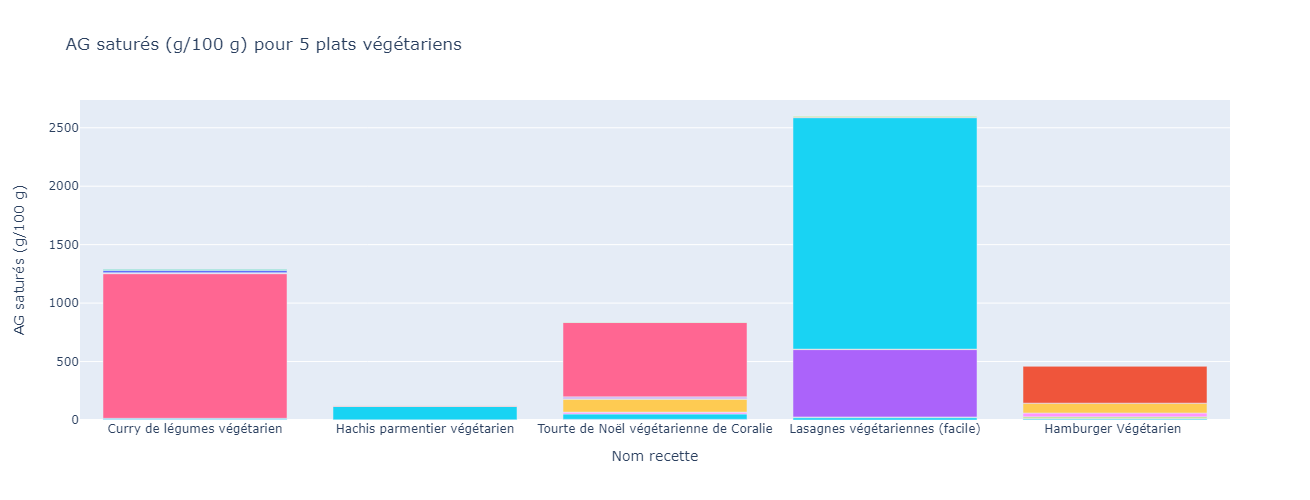

In [21]:
fig = px.bar(result, x="Nom recette", y="AG saturés (g/100 g)", color="Ingrédient", title="AG saturés (g/100 g) pour 5 plats végétariens", width=800, height=500)
fig.update_layout(showlegend=False)
fig.show()

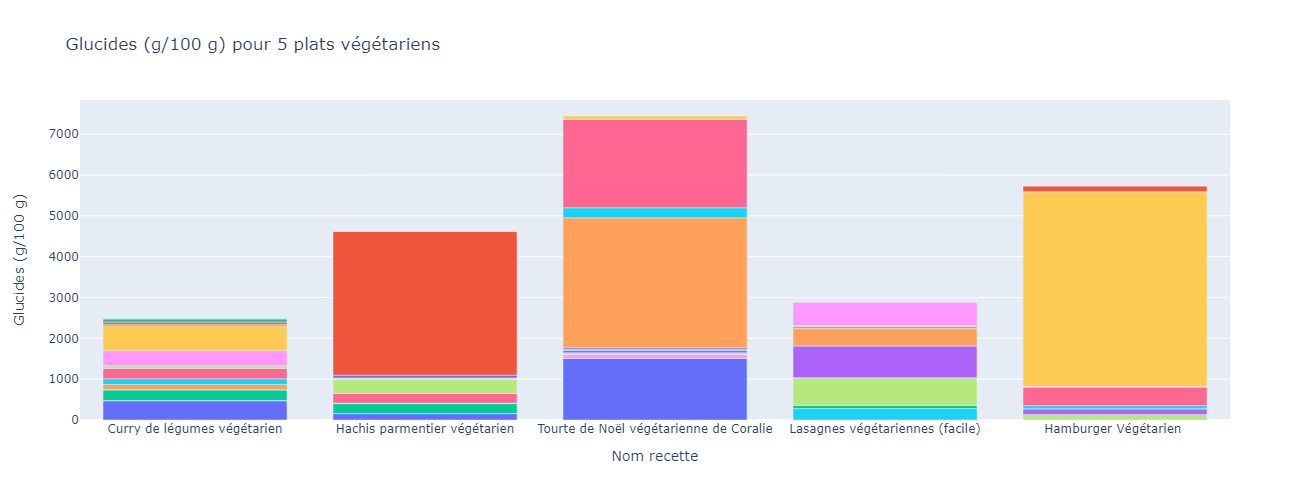

In [22]:
fig = px.bar(result, x="Nom recette", y="Glucides (g/100 g)", color="Ingrédient", title="Glucides (g/100 g) pour 5 plats végétariens", width=800, height=500)
fig.update_layout(showlegend=False)
fig.show()